<a href="https://colab.research.google.com/github/Muralimekala/python/blob/master/USA_Housing_loan_Trail_Url.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [2]:
url = 'https://raw.githubusercontent.com/Muralimekala/pythontrain/master/USA_Housing.csv'
df = pd.read_csv(url)
#USA_Housing.CSV
df.head(10)
#print("\n")
#print(df)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [0]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


# Data  Pre processing

In [0]:
## Remove unnecessary variables
df.drop(['Address'], axis=1, inplace=True)
df.head()
## Remove unnecessary variables
#train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
#train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [3]:
## Deal with Missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df) ## Pass your dataset name

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


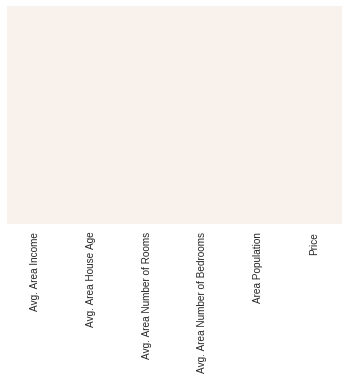

In [0]:
missingdata=df.isnull()
sns.heatmap(missingdata,yticklabels=False,cbar=False)

In [0]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [0]:
X = df.drop('Price', 1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] ## Replace X with your indepedent data type
vif_s =pd.Series(vif, index =X.columns)
print(vif_s)

Avg. Area Income                29.650899
Avg. Area House Age             27.447775
Avg. Area Number of Rooms       45.257291
Avg. Area Number of Bedrooms    14.537873
Area Population                 12.825450
dtype: float64


In [0]:
y = df.Price
## Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# Multiple Linear regression

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

print("\n")

print("Model Performance Test: In terms of Cross validation")

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 81659.20163294474
MSE: 10341014971.35724
RMSE: 101690.78115226199
Explained Variance Score: 91.40839045147915


Model Performance Test: In terms of Cross validation
Cross val Mean Abs Error: -81432.15693037343
Cross Val Explained Variance: 91.85216264142588


Model Performance Test: In terms of r2
r2: 0.9140203371658407
adj_r2= 0.9137325872902244


Model Performance Test: Bias-Variance
Training_r2= 0.9195515139598488
Test_r2= 0.9140203371658409


Model Performance Test: MultiCollinearity
VIF Train: 12.430314717183217
VIF Test: 11.630657379162304


In [0]:
#Obervations


In [0]:
coeff = DataFrame(X.columns) ## capture all the columns of X

(Area Population, 15.068252068798756)                    15.068252
(Avg. Area Income, 21.722601365599157)                   21.722601
(Avg. Area Number of Bedrooms, 1724.053734750662)      1724.053735
(Avg. Area Number of Rooms, 121130.56380555064)      121130.563806
(Avg. Area House Age, 167612.97224435315)            167612.972244
dtype: float64


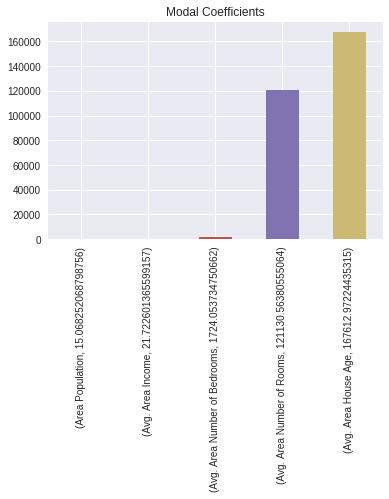

In [0]:
## printing all the co-efficients
coeff = DataFrame(X.columns) ## capture all the columns of X
coeff['Coefficient Estimate'] = Series(regressor.coef_).sort_values()
#print(coeff)

#predictors = X_train.columns
coef = Series(regressor.coef_,coeff).sort_values()
print(coef)


coef.plot(kind='bar', title='Modal Coefficients')

# Inference

In [0]:
## Lets validate it

train_inv = pd.read_csv(url) ## Read the data once more

print("Mean Sales=",train_inv['Price'].mean())
print("\n")

Mean Sales= 1232072.65414236




## Ridge Regression (Will shrink the coefficients to reduce multicollinearity)


In [0]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.05, normalize=True) ## play with alpha

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg_mae = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("Standard_Dev for Explained Variance=",regression_avg.std()*100)
print("Standard_Dev for Mean Abs Error=",regression_avg_mae.std()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 82332.3550317208
MSE: 10448817355.788324
RMSE: 102219.45683571364


Model Performance Test: In terms of Cross validation
Explained Variance Score: 91.31845077350921
Cross val Mean Abs Error: 0.9185216264142587
Cross Val Explained Variance: 91.62295287642183
Standard_Dev for Explained Variance= 1.1299859933059389
Standard_Dev for Mean Abs Error= 445730.61596940516


Model Performance Test: In terms of r2
r2: 0.913124021601868
adj_r2= 0.9128332720088355


Model Performance Test: Bias-Variance
Training_r2= 0.9172873964914595
Test_r2= 0.913124021601868


Model Performance Test: MultiCollinearity
VIF Train: 12.09005589936176
VIF Test: 11.51066173225972


                              0  Coefficient Estimate
0              Avg. Area Income             20.661876
1           Avg. Area House Age         159374.280306
2     Avg. Area Number of Rooms         113574.388348
3  Avg. Area Number of Bedrooms           4438.844510
4               Area Population             14.328953


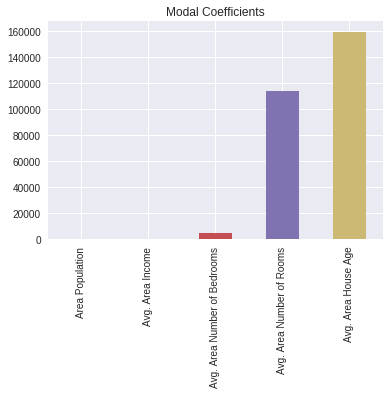

In [0]:
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(regressor.coef_)
print(coeff)

predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

# Lasso Regression (Will eliminate features even at small values of alpha)

In [0]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.3, normalize=True) ## play with alpha
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 81658.05065420171
MSE: 10340709569.606226
RMSE: 101689.27952152197


Model Performance Test: In terms of Cross validation
Explained Variance Score: 91.40864444647839
Cross val Mean Abs Error: -81432.37261745942
Cross Val Explained Variance: 91.85215313576155


Model Performance Test: In terms of r2
r2: 0.914022876407845
adj_r2= 0.9137351350303612


Model Performance Test: Bias-Variance
Training_r2= 0.9195515036221871
Test_r2= 0.9140228764078449


Model Performance Test: MultiCollinearity
VIF Train: 12.430313119883149
VIF Test: 11.631000878136419


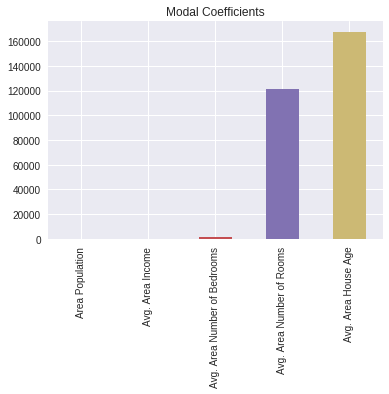

In [0]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

# ElasticNet (Best of Lasso and Ridge)


In [0]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.8, l1_ratio=0.3,normalize=False) ## play with alpha and l1_ratio
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 99695.3935339245
MSE: 15272472795.409613
RMSE: 123581.84654474788


Model Performance Test: In terms of Cross validation
Explained Variance Score: 87.31115571989405
Cross val Mean Abs Error: -100907.37107647551
Cross Val Explained Variance: 87.44344568221841


Model Performance Test: In terms of r2
r2: 0.8730180678366387
adj_r2= 0.8725930948374306


Model Performance Test: Bias-Variance
Training_r2= 0.8758624033205243
Test_r2= 0.8730180678366386


Model Performance Test: MultiCollinearity
VIF Train: 8.05557725257086
VIF Test: 7.875136115534191


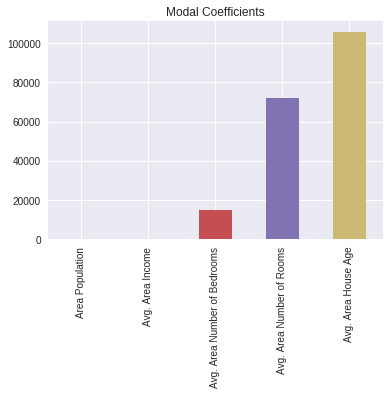

In [0]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

# xgboost

In [0]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


# Applying k-Fold Cross Validation using AUC-ROC Curve 
#https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

mean_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, scoring="roc_auc", cv = 7).mean()
std_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, scoring="roc_auc", cv = 7).std()


print ("Accuracy=",mean_score*100)
print("Standard Deviation",std_score*100)

In [0]:
import xgboost as xgb
regressor= xgb.XGBRegressor()#max_features=0.8
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

#adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
#print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)